In [1]:
# Import all necessary libraries
import pandas as pd
print('Pandas version: ', pd.__version__)

import numpy as np
print('NumPy version: ', np.__version__)

import matplotlib
print('Matplotlib version: ', matplotlib.__version__)

from matplotlib import pyplot as plt

import sklearn
print('Scikit-Learn version: ', sklearn.__version__)

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn import preprocessing
from sklearn.pipeline import Pipeline

from sklearn.cluster import DBSCAN

import pickle
print('Pickle version: ', pickle.format_version)
import os

Pandas version:  1.5.0
NumPy version:  1.23.4
Matplotlib version:  3.6.1
Scikit-Learn version:  1.1.2
Pickle version:  4.0


In [2]:
# Define purchases : a client bought one or more 'libelles'
all_purchases = pd.read_csv('../KMeans/all_purchases.csv', usecols=["CLI_ID", "LIBELLE"])

In [3]:
# Get a list of all unique clients
clients = np.unique(all_purchases['CLI_ID'])

In [4]:
# Get a list of all unique libelles
libelles = np.unique(all_purchases['LIBELLE'])

In [5]:
# Load list of items for clients
clients_items_list = pickle.load(open('../KMeans/items_list_for_client.txt', 'rb'))
print('Items list for', len(clients), ' clients')
print('A list of first client bought items: \n', clients_items_list[:2]) 

Items list for 853514  clients
A list of first client bought items: 
 ['730, 730, 200, 361, 732', '415, 925, 733, 733, 733, 908, 908, 463, 463']


In [6]:
# Vectorize each string and return all vectors and feature names
def prepSparseMatrix(list_of_str):
    cv = CountVectorizer()
    sparseMatrix = cv.fit_transform(list_of_str)
    return sparseMatrix, cv.get_feature_names_out()

In [7]:
sparseMatrix, feature_names = prepSparseMatrix(clients_items_list)

In [8]:
# For each item, 0 if client did not buy it, 1 if client bought it
df_sparseMatrix = pd.DataFrame.sparse.from_spmatrix(sparseMatrix, index = clients, columns = feature_names)
df_sparseMatrix

,10,100,1000,1001,1002,1003,1004,1005,1006,1007,...,990,991,992,993,994,995,996,997,998,999
1490281,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13290776,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20163348,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20200041,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20561854,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997048745,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997048751,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997048769,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997048777,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
exists = os.path.exists("models/")
if not exists:
    os.makedirs("models/")
    print(f"'models/' was created")

In [46]:
def generate_models():
    for i in range(0, 5):
        model = Pipeline([
            ('norm', preprocessing.Normalizer()), 
            ('svd', TruncatedSVD()), 
            ('dbscan', DBSCAN(min_samples=16, eps=0.02, algorithm="ball_tree"))
        ])
        dataset = sparseMatrix[i * 10000 : (i + 1) * 10000]
        model.fit(dataset)
        pickle.dump(model, open(f"models/dbscan_{i}.pkl", "wb"))

In [47]:
generate_models()

dbscan_0


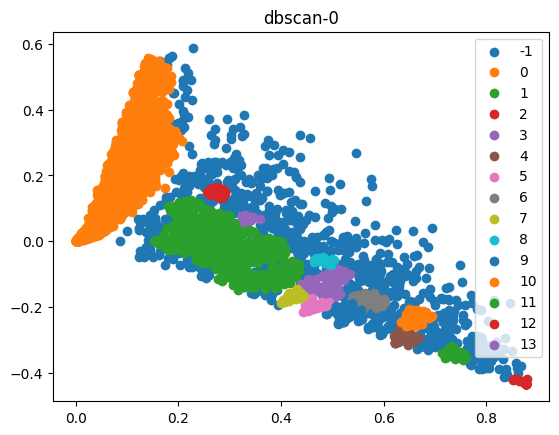

dbscan_1


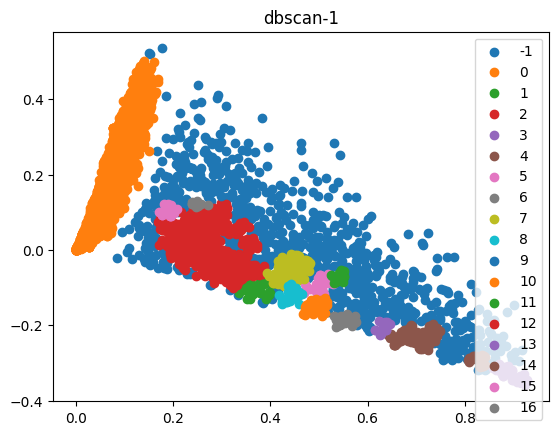

dbscan_2


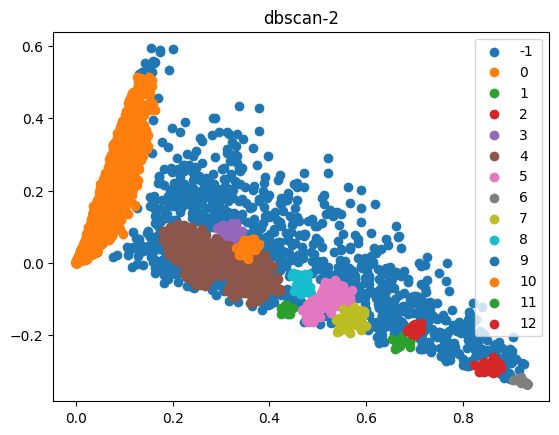

dbscan_3


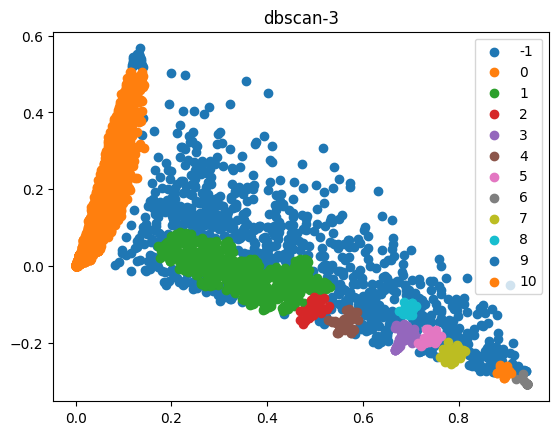

dbscan_4


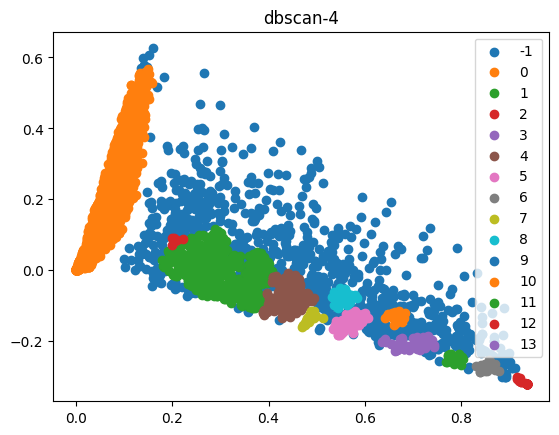

In [49]:
for i in range (0,5):
    norm = preprocessing.Normalizer()
    normalized = norm.fit_transform(sparseMatrix[i * 10000 : (i + 1) * 10000])
    svd = TruncatedSVD()
    df_svd = svd.fit_transform(normalized)
    m = pickle.load(open(f"models/dbscan_{i}.pkl", "rb"))
    print(f"dbscan_{i}")
    clusters = m['dbscan'].labels_
    for u in np.unique(clusters):
        filtered_label = df_svd[clusters == u]
        plt.scatter(df_svd[clusters == u , 0] , df_svd[clusters == u , 1] , label = u)
        plt.title(f"dbscan-{i}")
    plt.legend()
    plt.show()